In [29]:
import pandas as pd
import librosa
import librosa.display
import matplotlib
import matplotlib.pylab as plt


In [30]:
sample_music = pd.read_csv('/Users/BenH/Desktop/Thrive/Data/features_30_sec.csv')
sample_music.tail(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock
999,rock.00099.wav,661794,0.358401,0.085884,0.054454,0.000336,1609.795082,422203.216152,1797.213044,120115.632927,...,59.167755,-7.069775,73.760391,0.028346,76.504326,-2.025783,72.189316,1.155239,49.662510,rock


In [31]:
import sklearn
import numpy as np
import os 

In [32]:
y, sr = librosa.load('/Users/BenH/Desktop/Thrive/Data/genres_original/jazz/jazz.00004.wav')
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Tempo: {:2f}'.format(tempo))

Tempo: 64.599609


In [33]:
beat_frames

array([  68,  111,  152,  193,  238,  279,  320,  361,  401,  442,  486,
        527,  567,  607,  647,  690,  732,  771,  810,  853,  895,  936,
        978, 1019, 1060, 1100, 1141, 1183])

In [34]:
pd.Series(y).plot(figsize = (10,5), lw=1)
plt.show()
#SHOW THIS WITH AN AUDIO THAT WILL ACTUALLY SHOW IT BEING TRIMMED
y_trim, _ = librosa.effects.trim(y)
#pd.Series(y_trim).plot(figsize = (10,5), lw=1)
#plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.


ValueError: Failed to find font DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0, and fallback to the default font was disabled

<Figure size 1000x500 with 1 Axes>

In [9]:
d = librosa.stft(y)
d_deci = librosa.amplitude_to_db(np.abs(d), ref = np.max)
d_deci.shape


(1025, 1293)

In [11]:
d_deci

array([[-38.293674, -45.994236, -65.27995 , ..., -51.200485, -52.798904,
        -30.50072 ],
       [-37.97537 , -43.963135, -55.46855 , ..., -60.452904, -46.764324,
        -30.289995],
       [-37.467773, -43.840595, -56.81787 , ..., -52.81012 , -48.378693,
        -30.11162 ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -76.51524 ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -76.3961  ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -76.40434 ]], dtype=float32)

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
spec = librosa.display.specshow(d_deci, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(spec, ax=ax, format='%+2.0f dB')
plt.show()
#SHOW MEL SPECTOGRAM AS WELL

<Axes: >

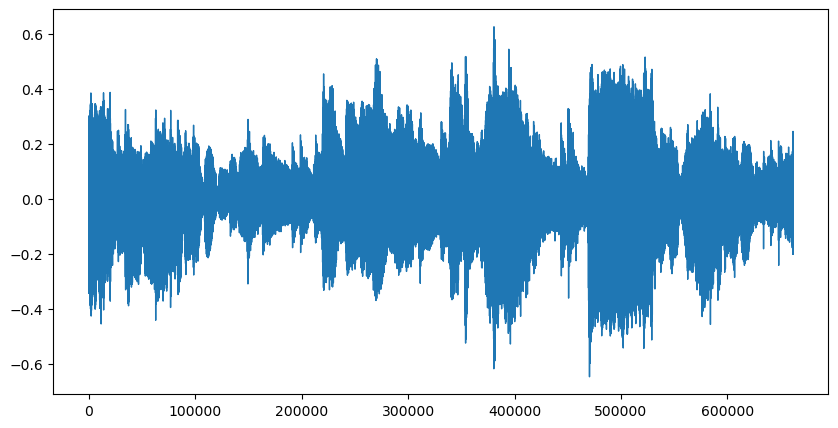

In [66]:
pd.Series(y_trim).plot(figsize = (10,5), lw=1)

<Axes: >

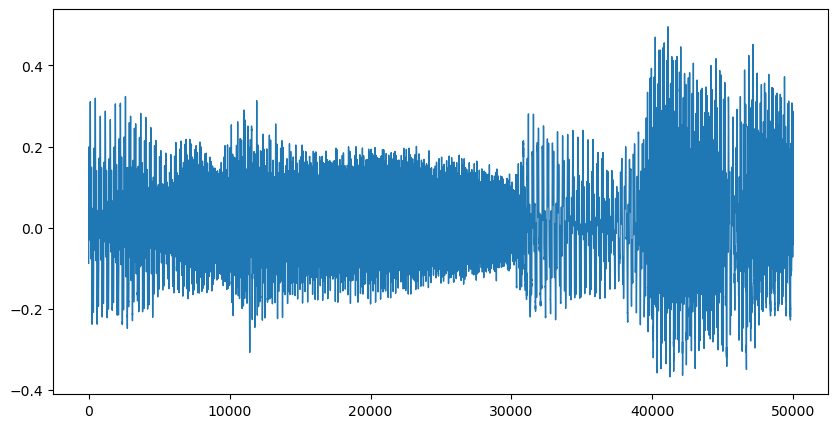

In [17]:
pd.Series(y_trim[300000:350000]).plot(figsize = (10,5), lw=1)

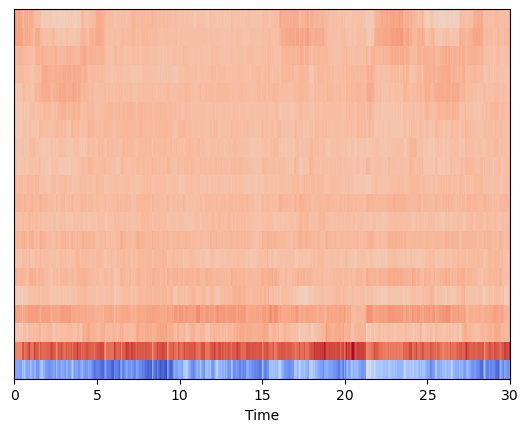

In [34]:
y, sr = librosa.load('/Users/BenH/Desktop/Thrive/Data/genres_original/jazz/jazz.00004.wav')
mfccs = librosa.feature.mfcc(y=y, sr=sr)
librosa.display.specshow(mfccs, sr=sr, x_axis = 'time')

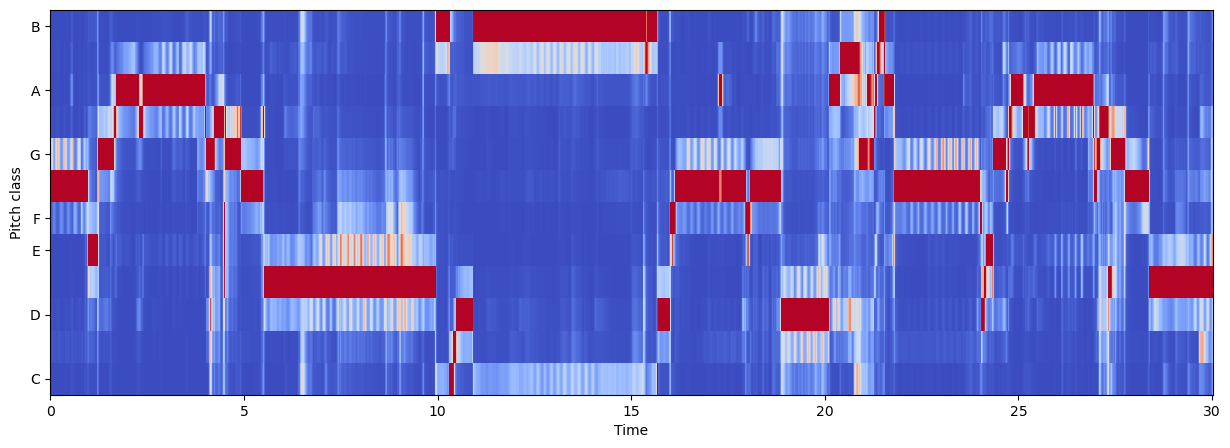

In [36]:
hop = 512
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop, cmap='coolwarm')

In [42]:
#This is to get the root mean square
rms = librosa.feature.rms(y=y)
rms

array([[0.10005803, 0.12790911, 0.16098782, ..., 0.07253473, 0.07810637,
        0.07283746]], dtype=float32)

In [43]:
rms.shape

(1, 1293)

In [44]:
#This is to get the spectral centroid
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_cent

array([[1490.84829998, 1499.84176917, 1610.19528972, ...,  762.2357136 ,
         579.48665612,  744.59627573]])

In [45]:
spec_cent.shape

(1, 1293)

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

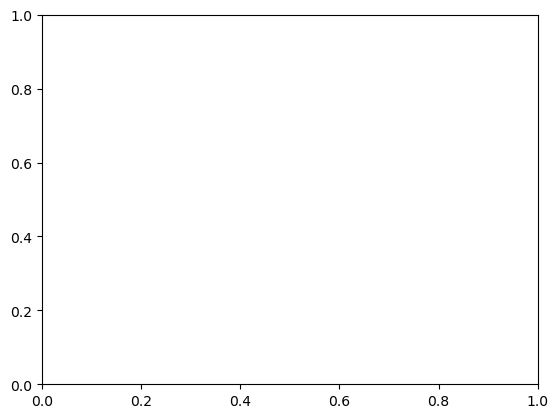

In [54]:
#GET THIS WORKING 
spec_time = range(len(spec_cent))
f = librosa.frames_to_time(spec_time)
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(f, minmax_scale(spec_cent, axis=0), color='r')


In [53]:
#AND THIS 
spec_time = range(len(spec_cent))
f = librosa.frames_to_time(spec_time)
librosa.display.waveshow(y=y, sr=sr, alpha=0.4)
plt.plot(f, minmax_scale(spec_cent, axis=0

SyntaxError: incomplete input (3251876661.py, line 4)

In [56]:
#This is how you get the spectral rolloff
spec_roll = librosa.feature.spectral_rolloff(y=y, sr=sr)
spec_roll

array([[2993.11523438, 3025.41503906, 3359.1796875 , ...,  958.22753906,
         829.02832031,  958.22753906]])

In [57]:
spec_roll.shape

(1, 1293)

In [58]:
#This is how you get the zero crossing rate
z_cross = librosa.zero_crossings(y=y)
print(sum(z_cross))
#COULD CREATE THESE ALL INTO FUNCTIONS SO THAT YOU CAN JUST CALL GET_CROSSING_COUNT(y) AND IT RETURN THE VALUE 


31643


In [76]:
#This is how you get the harmony 
#harm, perc = librosa.effects.hpss(y)
#harm
#PLOT EACH OF THE SPECTRALL ROLLOFF ETC

ModuleNotFoundError: No module named 'numba.core.inline_closurecall'